![Py4Eng](img/logo.png)

# Inference with pre-trained models
## Yoav Ram

In this session we will pre-trained models to classify images.
In this case, the models were pre-trained by other researchers.
We start with TensorFlow and then show an example with Keras.

In [2]:
%matplotlib inline
import numpy as np

# Our image

Start by loading an image to a `bytes` object; we can display it using the notebook's rich-display API.

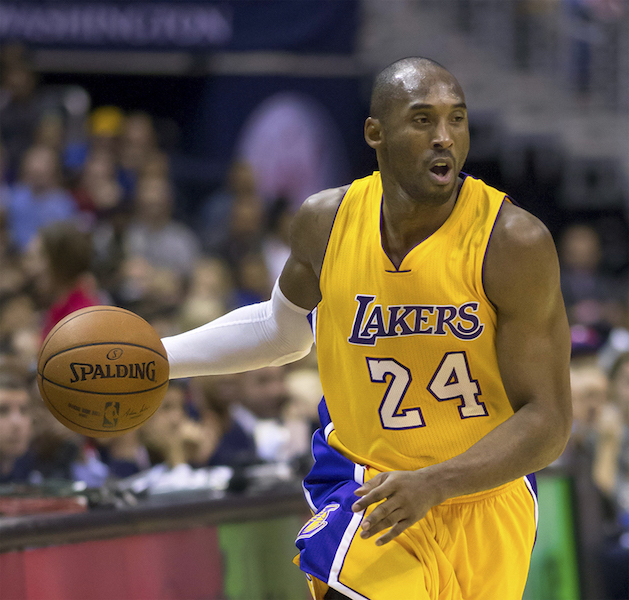

In [12]:
image_filepath = '../data/Kobe_Bryant_2014.jpg'

if not tf.gfile.Exists(image_filepath):
    tf.logging.fatal('File does not exist %s', image_filepath)
image_data = tf.gfile.FastGFile(image_filepath, 'rb').read()
Image(data=image_data, width=200)

# Prediction with Keras
Using pre-trained models is easy with Keras.

Let's load the [ResNet50 model](https://keras.io/applications/#resnet50) directly from the `keras.applications` module, together with some processing utilities. This follows code from [Keras docs](https://keras.io/applications/).

[ResNet50](https://github.com/KaimingHe/deep-residual-networks) was developed by Microsoft and was also trained in ImageNet data (like Inception).
It uses [residual learning](https://arxiv.org/abs/1512.03385) to train very deep networks, up to 152 layers.
A nice summmary on residual learning is available [here](https://blog.waya.ai/deep-residual-learning-9610bb62c355).

In [2]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.utils import plot_model

First, load the model (including downloading it, which may take some time).

In [ ]:
model = ResNet50(weights='imagenet')

Now, let's see the ResNet50 architecture.

In [ ]:
plot_model(model, to_file='tmp.png')
image.load_img('tmp.png')

That's really nice.

Load an image, convert it to array, and preprocess it for ResNet50.

In [ ]:
img_path = '../data/Kobe_Bryant_2014.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Now use the model to predict and then decode the predictions into a list of tuples (class, description, probability), one such list for each sample in the batch.

basketball (prob = 0.9994)
ballplayer (prob = 7.601e-05)
football_helmet (prob = 7.558e-05)


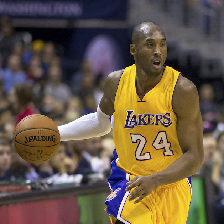

In [5]:
preds = model.predict(x)
decoded_preds = decode_predictions(preds, top=3)[0]
# print('Predicted:', decode_predictions(preds, top=3))
# print(preds)
for id_, label, prob in decoded_preds:
    print('{} (prob = {:.4g})'.format(label, prob))
img

# Re-training

In [5]:
import keras

model = keras.models.load_model('../data/keras_cnn_model.h5')
with open("../data/keras_cnn_history.p", "rb") as f:
    history = pickle.load(f)

TypeError: softmax() got an unexpected keyword argument 'axis'

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Deep Learning for Software Developers_](https://python.yoavram.com/Deep4Devs) course.

The notebook was written using [Python](http://python.org/) 3.6.3, [IPython](http://ipython.org/) 6.2.1, [Jupyter](http://jupyter.org) 5.1.0.

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)